<a href="https://colab.research.google.com/github/eliasader/MachineLearningIRISPython/blob/main/MachineLearningWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


### Import Iris Data

In [2]:
cols = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class']

df = pd.read_csv('iris.data', names=cols)


### Check unique values


In [ ]:
df['class'].unique()

### Gen graphs for analysis

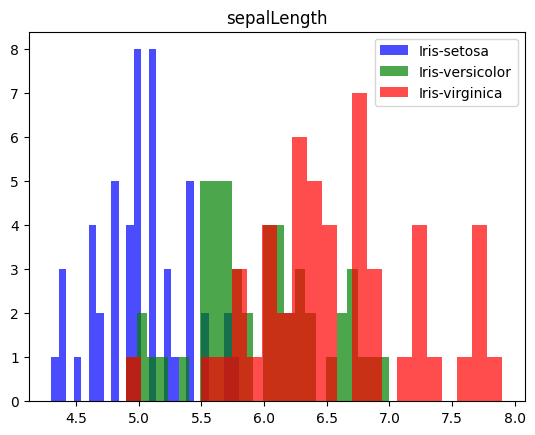

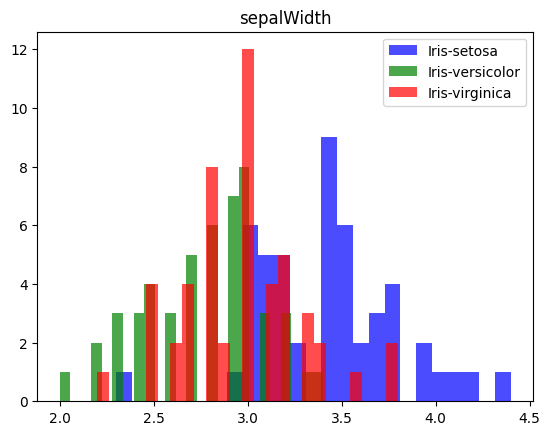

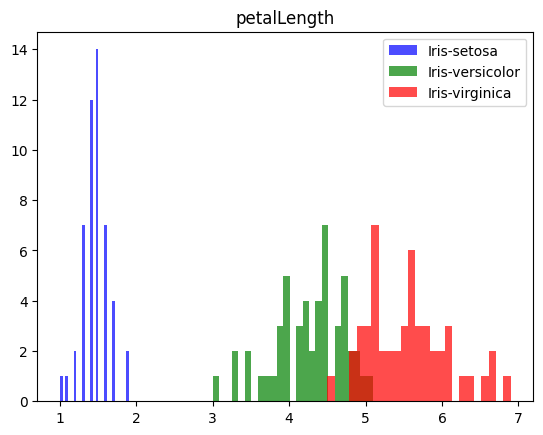

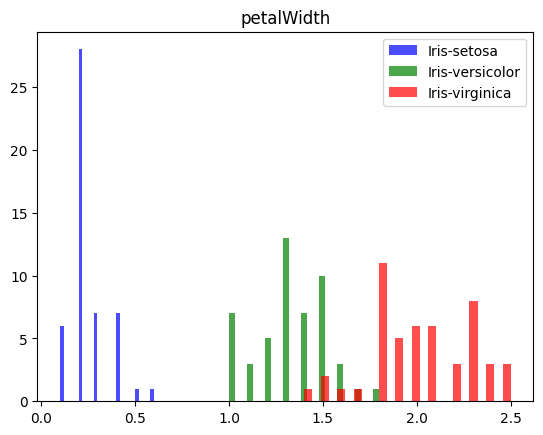

In [4]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 'Iris-setosa'][label],color='blue',label='Iris-setosa',alpha=0.7,bins=25)
  plt.hist(df[df['class'] == 'Iris-versicolor'][label],color='green',label='Iris-versicolor',alpha=0.7,bins=25)
  plt.hist(df[df['class'] == 'Iris-virginica'][label],color='red',label='Iris-virginica',alpha=0.7,bins=25)
  plt.legend()
  plt.title(label)
  plt.show()

### Min-max method test

In [ ]:
sepalLengthMM = MinMaxScaler().fit_transform(df['sepalWidth'].values.reshape(-1,1))

<Axes: ylabel='Frequency'>

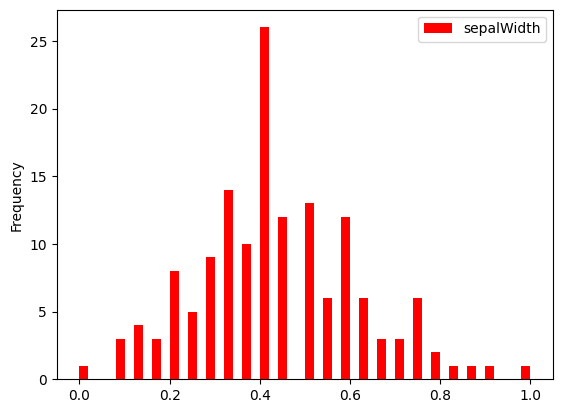

In [ ]:
sepalLengthMM = pd.DataFrame(sepalLengthMM, columns=['sepalWidth'])
sepalLengthMM.plot(
    kind = 'hist',
    bins = 50,
    color = 'red'
)


<Axes: ylabel='Frequency'>

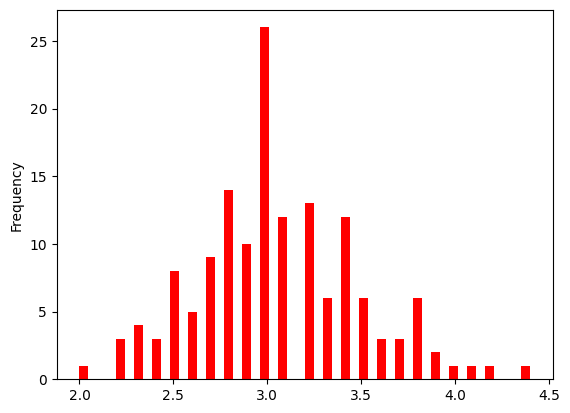

In [ ]:
df['sepalWidth'].plot(
    kind = 'hist',
    bins = 50,
    color = 'red'
)

### Z-score method test


<Axes: ylabel='Frequency'>

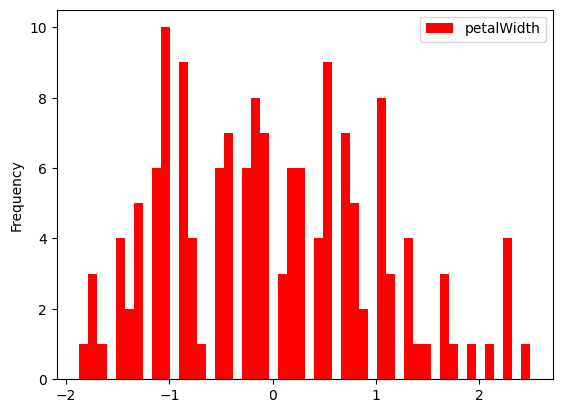

In [5]:
sepalLengthMM = StandardScaler().fit_transform(df['sepalLength'].values.reshape(-1,1))
sepalLengthMM = pd.DataFrame(sepalLengthMM, columns=['petalWidth'])
sepalLengthMM.plot(
    kind = 'hist',
    bins = 50,
    color = 'red'
)

### Test and train data

In [7]:
def scaleDataset(dataframe):
  response = 'class'
  y = df[response]
  X = df.iloc[:, 2:4]

  scaler = StandardScaler()

  X = scaler.fit_transform(X)


  return X, np.reshape(y.values, (-1,1))


In [8]:
dataScaled = scaleDataset(df)

XTrain, XTest, yTrain, yTest = train_test_split(dataScaled[0], dataScaled[1], test_size=0.4, random_state=1)


In [11]:
yTrain.shape

(90, 1)

In [10]:
XTrain.shape

(90, 2)

In [9]:
yTrain = (yTrain == 'Iris-setosa').astype(int)
yTest = (yTest == 'Iris-setosa').astype(int)

## **Neural Network**

In [12]:
from sklearn.linear_model import Perceptron


In [ ]:
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1)
clf.fit(XTrain, yTrain)

In [14]:
yPred = clf.predict(XTest)


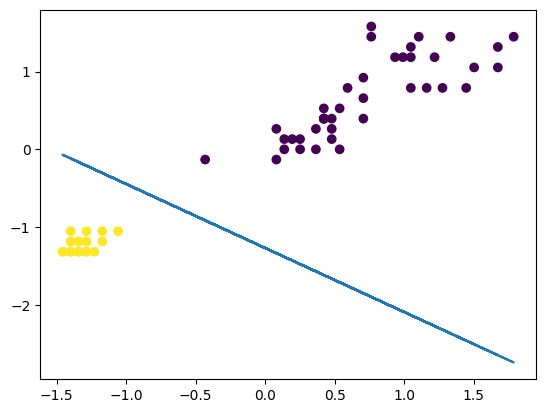

In [18]:
w1 = round(clf.coef_[0][0],3)
w2 = round(clf.coef_[0][1],3)
b = clf.intercept_[0]
fig, ax = plt.subplots()
ax.scatter(XTest[:, 0], XTest[:, 1], c=yTest)
ax.plot(XTest[:, 0], (-w1*XTest[:, 0] - b)/w2)

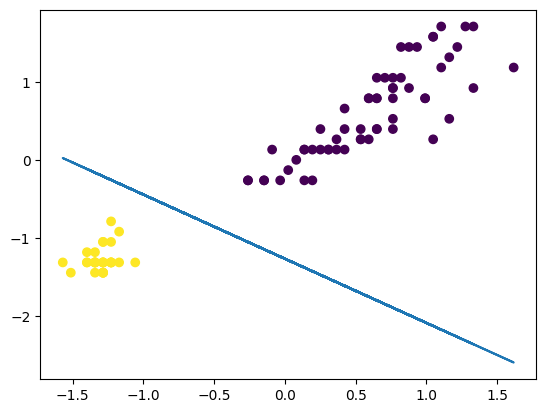

In [20]:

fig, ax = plt.subplots()
ax.scatter(XTrain[:, 0], XTrain[:, 1], c=yTrain)
ax.plot(XTrain[:, 0], (-w1*XTrain[:, 0] - b)/w2)